In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('data/tips.xls')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
df.total_bill.max()

50.81

<AxesSubplot:>

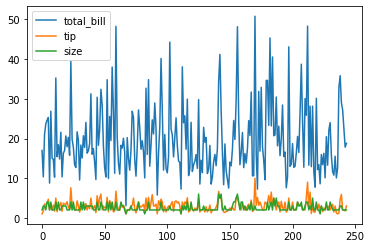

In [10]:
df.plot()

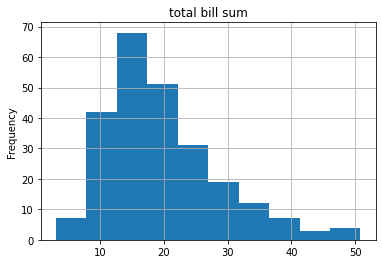

In [15]:
df.total_bill.plot(kind='hist', grid=True, title='total bill sum');

In [16]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:title={'center':'# of visitors per day'}>

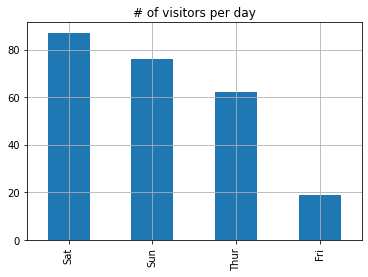

In [19]:
df.day.value_counts().plot(kind='bar', 
                           grid=True, 
#                            colormap='coolwarm', 
                           title='# of visitors per day')

<AxesSubplot:xlabel='sex,smoker'>

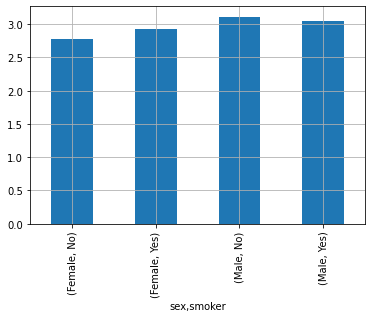

In [21]:
df.groupby(['sex', 'smoker']).tip.mean().plot(kind='bar', grid=True)

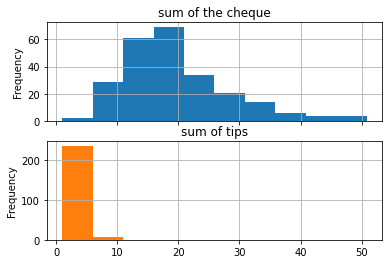

In [25]:
df[['total_bill', 'tip']].plot(
    kind='hist',
    subplots=True,
    title=['sum of the cheque', 'sum of tips'],
    legend=False, 
    grid=True
);

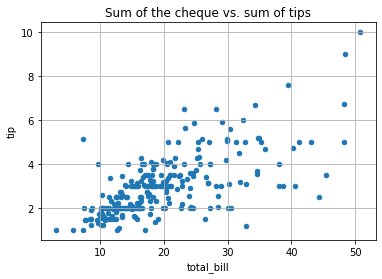

In [27]:
df.plot(
    kind='scatter',
    x='total_bill',
    y='tip',
    grid=True,
    title='Sum of the cheque vs. sum of tips'
);

<AxesSubplot:xlabel='day'>

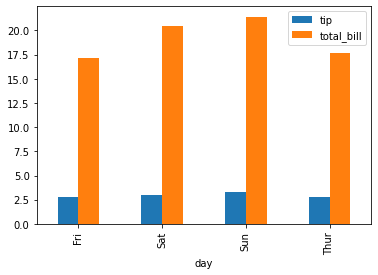

In [34]:
df.pivot_table(values=['total_bill', 'tip'], index='day', aggfunc='mean').plot(kind='bar')

In [29]:
df.groupby('day')[['tip', 'total_bill']].mean()

,tip,total_bill
day,,
Fri,2.734737,17.151579
Sat,2.993103,20.441379
Sun,3.255132,21.410000
Thur,2.771452,17.682742


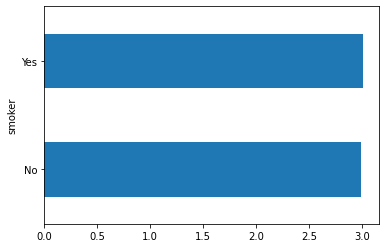

In [40]:
# Какой вариант кода лучше всего подходит для построения графика, отображающего среднюю сумму чаевых, 
# которые оставляют курящие и некурящие посетители?
df.pivot_table(values='tip', aggfunc='mean', index='smoker').plot(kind='barh', legend=False);

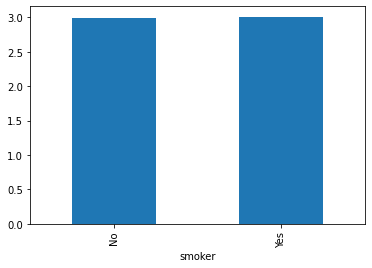

In [39]:
df.groupby('smoker').tip.mean().plot(kind='bar', legend=False);

# MATPLOTLIB
### OOP approach

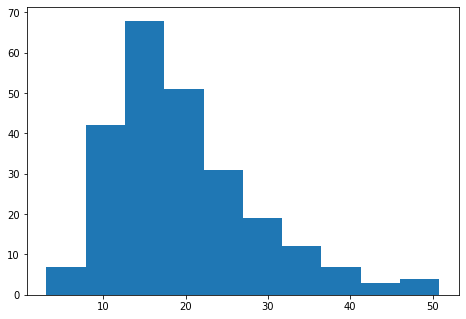

In [46]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill']);

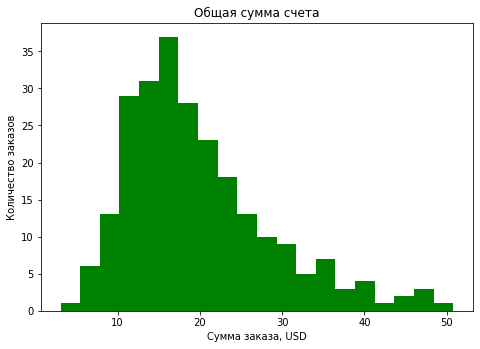

In [48]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD');

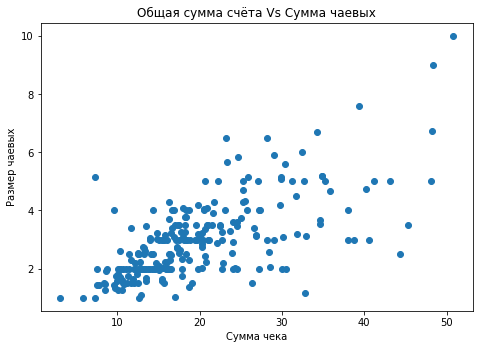

In [49]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых');

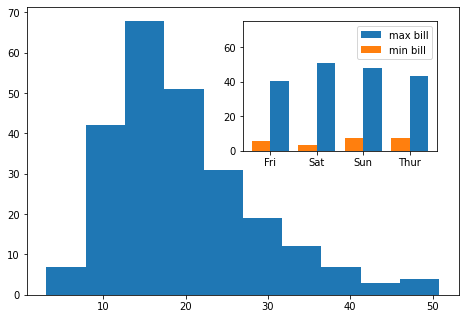

In [106]:
fig = plt.figure()
main_axes = fig.add_axes([0,0,1,1])
insert_axes = fig.add_axes([0.5, 0.5, 0.45, 0.45])
main_axes.hist(df['total_bill'])
data = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()
insert_axes.bar(x=data.day, height=data['max'], width = 0.4, align = 'edge', label='max bill')
insert_axes.bar(x=data.day, height=data['min'], width = -0.4, align = 'edge', label='min bill')
insert_axes.set_ylim(0, 75)
insert_axes.legend(loc = 0);

- [x] plot all data in the df
- [x] make a plot for only one column in the pandas and prettify the plot
- [ ] plot in the barplot the number of data that were obtained in different working days
- [ ] group the data by sex and smoker and show the number for all 4 groups
- [ ] make subplots - df[['total_bill', 'tip']] for hist
- [ ] visualize scatter plot: 'total_bill' vs. 'tip'

<AxesSubplot:>

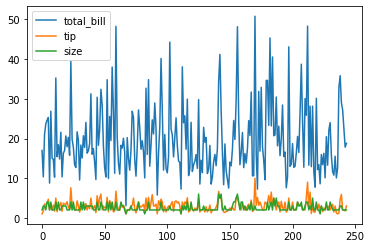

In [6]:
df.plot()

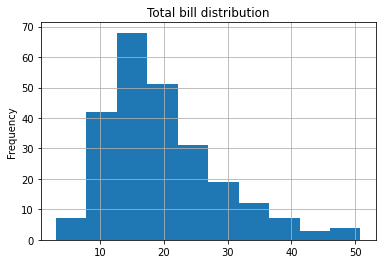

In [12]:
df.total_bill.plot(title='Total bill distribution', kind='hist', grid=True);

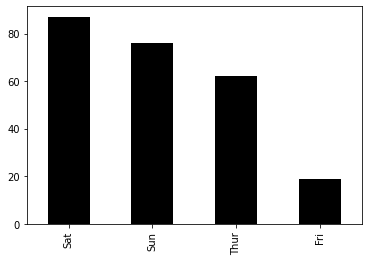

In [18]:
df.day.value_counts().plot(kind='bar', color='black');

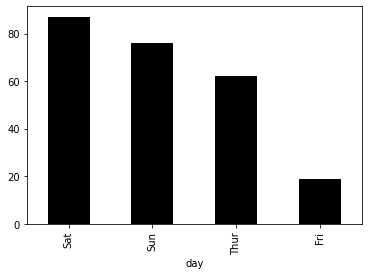

In [35]:
df.groupby('day').total_bill.count().sort_values(ascending=False).plot(kind='bar', color='black');

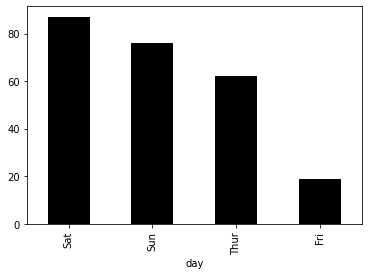

In [34]:
df.pivot_table(values='total_bill', index='day', aggfunc='count').sort_values('total_bill', ascending=False).plot(kind='bar', color='black', legend=False);

<AxesSubplot:xlabel='sex,smoker'>

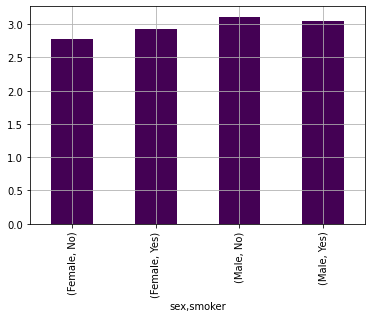

In [47]:
df.groupby(['sex', 'smoker']).tip.mean().plot(kind='bar', grid=True, colormap='viridis')

In [40]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


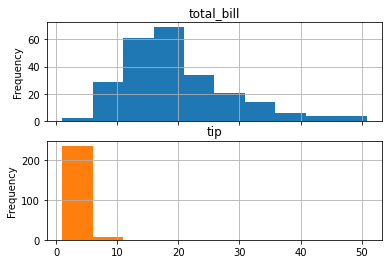

In [54]:
df[['total_bill', 'tip']].plot(
    kind='hist', 
    subplots=True, 
    grid=True, 
    legend=False, 
    title=['total_bill', 'tip']
);

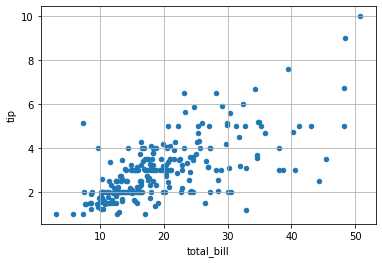

In [57]:
df.plot(x='total_bill', y='tip', kind='scatter', grid=True);

<AxesSubplot:xlabel='day'>

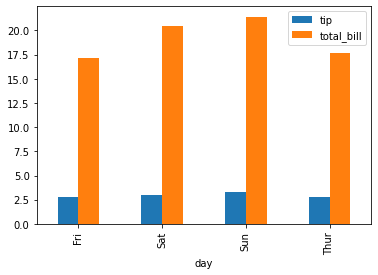

In [60]:
df.groupby('day')[['tip', 'total_bill']].mean().plot(kind='bar')

<AxesSubplot:xlabel='day'>

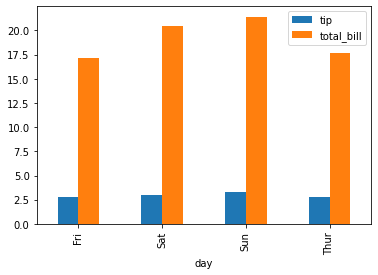

In [62]:
df.pivot_table(values=['total_bill', 'tip'], index='day', aggfunc='mean').plot(kind='bar')

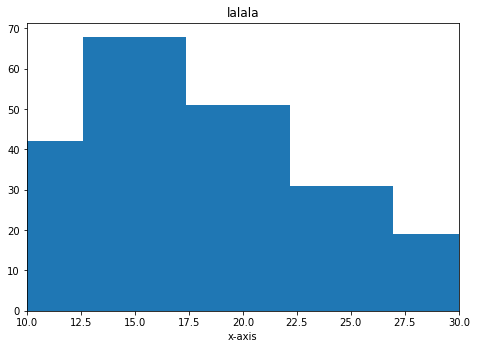

In [69]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df.total_bill);
axes.set_title('lalala');
axes.set_xlabel('x-axis');
axes.set_xlim([10, 30]);

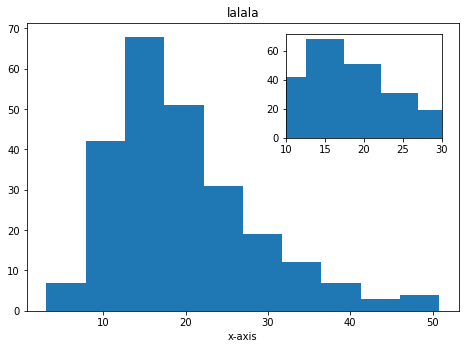

In [76]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
small_axes = fig.add_axes([0.6, 0.6, 0.36, 0.36])
axes.hist(df.total_bill)
small_axes.hist(df.total_bill);
axes.set_title('lalala');
axes.set_xlabel('x-axis');
small_axes.set_xlim([10, 30]);

In [90]:
bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()
bills_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


(0.0, 80.0)

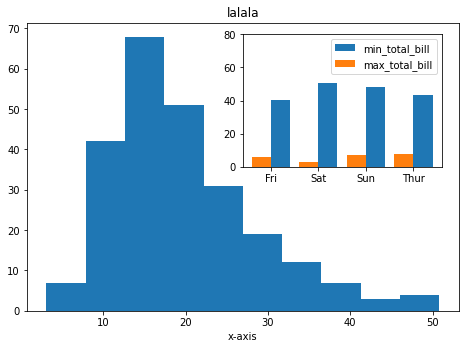

In [95]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
small_axes = fig.add_axes([0.5, 0.5, 0.46, 0.46])
axes.hist(df.total_bill)
small_axes.bar(x=bills_per_day.day, height=bills_per_day['max'],  align='edge', width=0.4, label='min_total_bill');
small_axes.bar(x=bills_per_day.day, height=bills_per_day['min'],  align='edge', width=-0.4, label='max_total_bill');
axes.set_title('lalala');
axes.set_xlabel('x-axis');
small_axes.legend()
small_axes.set_ylim([0,80])

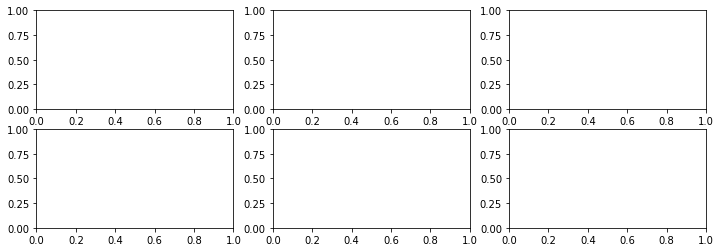

In [97]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4))

In [101]:
x = np.linspace(-3, 3, 1000)
y = np.exp(x)

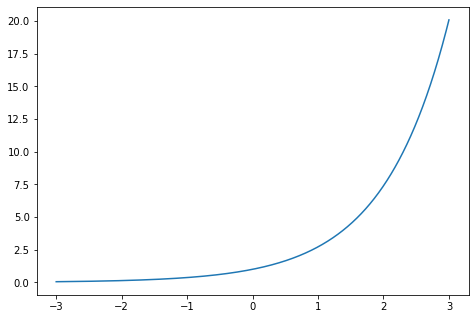

In [103]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y);

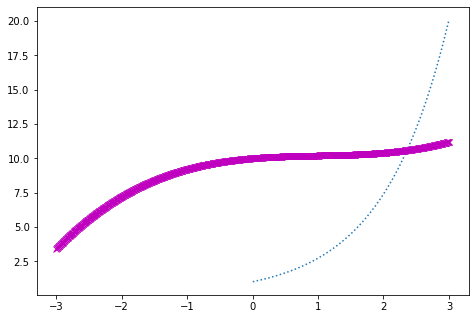

In [111]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y[500:], linestyle=':') 
axes.plot(x, y2, 'mx');

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

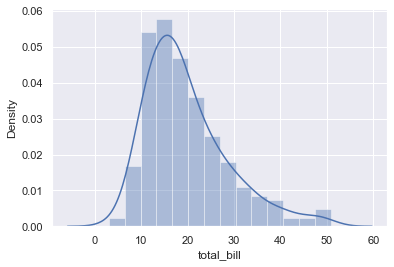

In [116]:
sns.set()
sns.distplot(df.total_bill)

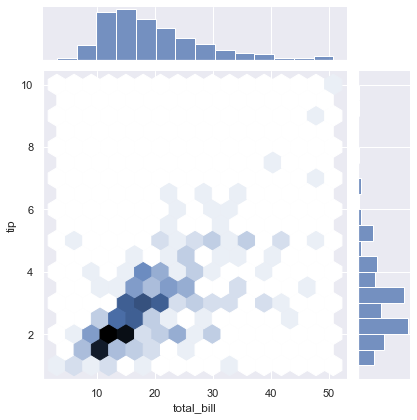

In [120]:
sns.jointplot(data=df, x='total_bill', y='tip', kind='hex')

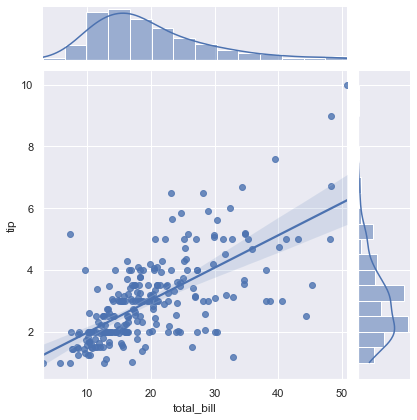

In [121]:
sns.jointplot(data=df, x='total_bill', y='tip', kind='reg')

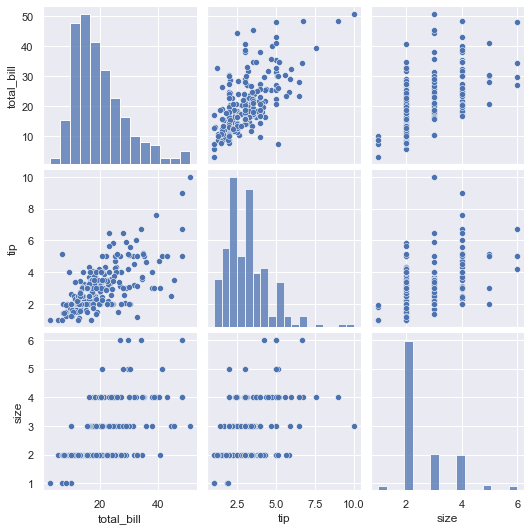

In [119]:
sns.pairplot(df)

#### Для построения гистограммы распределения категориального признака можно воспользоваться методом countplot:

<AxesSubplot:xlabel='day', ylabel='count'>

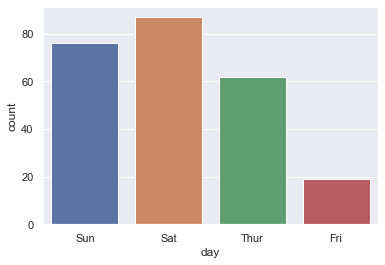

In [122]:
sns.countplot(df.day)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

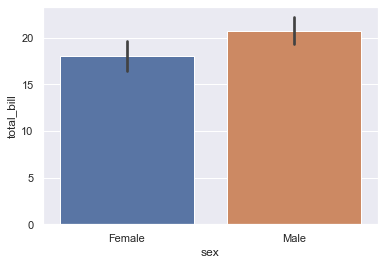

In [126]:
sns.barplot(data=df, x='sex', y='total_bill', estimator=np.mean)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

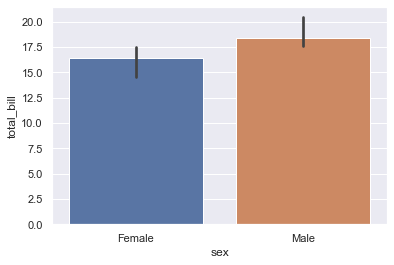

In [127]:
sns.barplot(data=df, x='sex', y='total_bill', estimator=np.median)

<AxesSubplot:xlabel='day', ylabel='tip'>

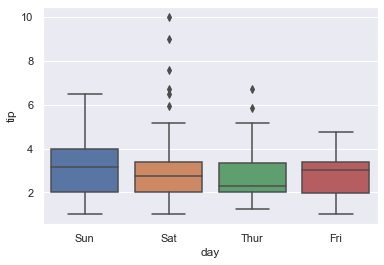

In [128]:
sns.boxplot(data=df, x='day', y='tip')

<AxesSubplot:xlabel='day', ylabel='tip'>

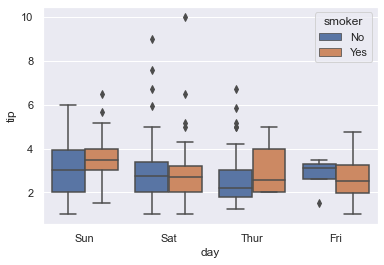

In [129]:
sns.boxplot(data=df, x='day', y='tip', hue='smoker')

<AxesSubplot:>

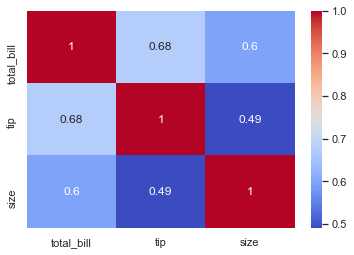

In [131]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [132]:
# !pip install plotly cufflinks

  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68722 sha256=c8fb123dce3be4984f2e909849bb676c971324d61e17b70071b57b1ce05e72f3
  Stored in directory: c:\users\voytik\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [133]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [134]:
init_notebook_mode(connected = True)
cf.go_offline()

In [135]:
df.iplot()

Как и при работе с методом plot в библиотеке Pandas, при изменении параметров метода iplot можно изменять тип и другие особенности диаграммы. Plotly позволяет создавать новые виды графиков. Например, этот тип графика позволяет не только показать на одной координатной плоскости сумму чека и размер чаевых для каждого заказа, но и демонстрирует, как изменяется разность между этими двумя суммами для разных заказов:

In [136]:
df[['total_bill', 'tip']].iplot(kind='spread')

In [138]:
df.iplot(kind='bubble', x='total_bill', y='size', size='tip')